## AIM


Build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression by using the **Rain in Australia** dataset for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'weatherAUS.csv'

df = pd.read_csv(data)

In [4]:
df.shape

(142193, 24)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
### Drop  RISK_MM variable
df.drop(['RISK_MM'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### Feature Engineering of Date Variable

In [9]:
df['Date'].dtypes

dtype('O')

In [10]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [12]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [13]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [15]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [16]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [17]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

### Explore `Location` variable

In [19]:


print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [20]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [21]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [22]:
pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore `WindGustDir` variable

In [23]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [24]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [25]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [26]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

### Explore `WindDir9am` variable

In [28]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [29]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [30]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [31]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

### Explore `WindDir3pm` variable

In [33]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [34]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [35]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [36]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [37]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
dtype: int64

`Interpretation`:  There are 3778 missing values in the `WindDir3pm` variable.

### Explore `RainToday` variable

In [38]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [39]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [40]:
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [41]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [42]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31455
NaN     1406
dtype: int64

`Interpretation`:  There are 1406 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [43]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [44]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [45]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

`Interpretation`:  We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

`Story`

Now, you explain Sam about Outliers.

An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining.
Many machine learning algorithms are sensitive to the range and distribution of attribute values in the input data. Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.
Even before predictive models are prepared on training data, outliers can result in misleading representations and in turn misleading interpretations of collected data. Outliers can skew the summary distribution of attribute values in descriptive statistics like mean and standard deviation and in plots such as histograms and scatterplots, compressing the body of the data.


Outliers are extreme values that fall a long way outside of the other observations. For example, in a normal distribution, outliers may be values on the tails of the distribution.

The process of identifying outliers has many names in data mining and machine learning such as outlier mining, outlier modeling and novelty detection and anomaly detection.



    Extreme Value Analysis: Determine the statistical tails of the underlying distribution of the data. For example, statistical methods like the z-scores on univariate data.
    
    Probabilistic and Statistical Models: Determine unlikely instances from a probabilistic model of the data. For example, gaussian mixture models optimized using expectation-maximization.
    
    Linear Models: Projection methods that model the data into lower dimensions using linear correlations. For example, principle component analysis and data with large residual errors may be outliers.
    
    Proximity-based Models: Data instances that are isolated from the mass of the data as determined by cluster, density or nearest neighbor analysis.
    
    Information Theoretic Models: Outliers are detected as data instances that increase the complexity (minimum code length) of the dataset.
    
    High-Dimensional Outlier Detection: Methods that search subspaces for outliers give the breakdown of distance based measures in higher dimensions (curse of dimensionality).
    
    
Here, we will be using `Extreme Value analysis` for our problem.


`How?`

Now, you ask Sam to print a summary of all the numerical variables, with a precision up to 2 decimal points.

So, he uses `round(___ ,2)` 


In [46]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

`Interpretation`:  On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.


`Story` 
We will draw boxplots to visualise outliers in the above variables. 

You explain Sam how to proceed.


`How?`

First, you will define the size of plot using `figsize=(x,y)`

Then you ask him to define the subplot using  `plt.subplot(x, y, z)`  

    The arguments Either a 3-digit integer or three separate integers describing the position of the subplot. If the three integers are nrows, ncols, and index in order, the subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.

    pos is a three digit integer, where the first digit is the number of rows, the second the number of columns, and the third the index of the subplot. i.e. fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5). Note that all integers must be less than 10 for this form to work.


Then, you define the boxplot on the required column.
For eg:


`plt.figure(figsize=(15,10))`

`plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')`


Text(0, 0.5, 'WindSpeed3pm')

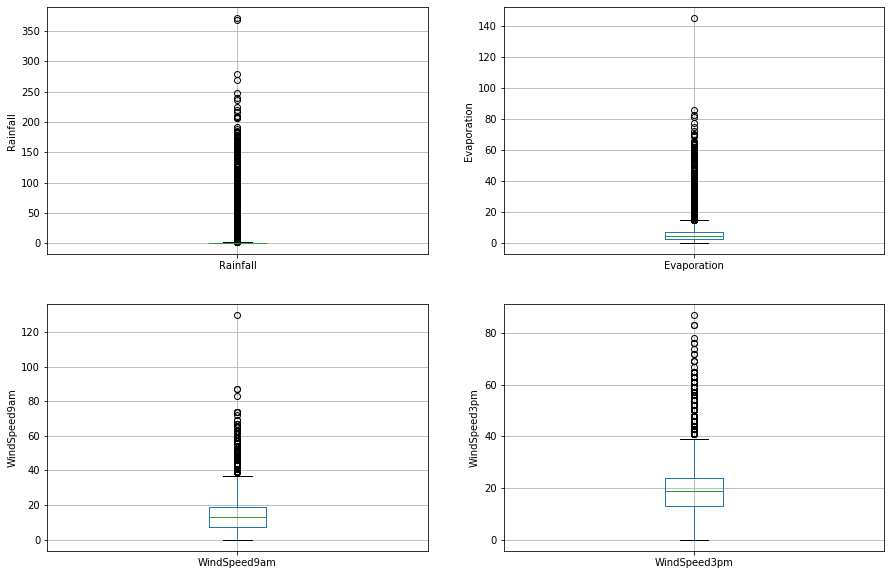

In [47]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

`Interpretation`:  The above boxplots confirm that there are lot of outliers in these variables.


`Story`
Now, you explain Sam that he should now check the values using Histograms to see if they are normally distributed or not.

### Check the distribution of variables


Now, We will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then we will do `Extreme Value Analysis`(As stated before), otherwise if they are skewed, we will find IQR (Interquantile range).

`How?`

To plot the histograms, you ask him to follow the same procedure as the boxplot, and change the fig variable to `
fig = df.column.hist(bins=10)`
For ease, bins are set to 10. In a histogram, the total range of data set (i.e from minimum value to maximum value) is divided into 8 to 15 equal parts. These equal parts are known as bins or class intervals. Each and every observation (or value) in the data set is placed in the appropriate bin.

Text(0, 0.5, 'RainTomorrow')

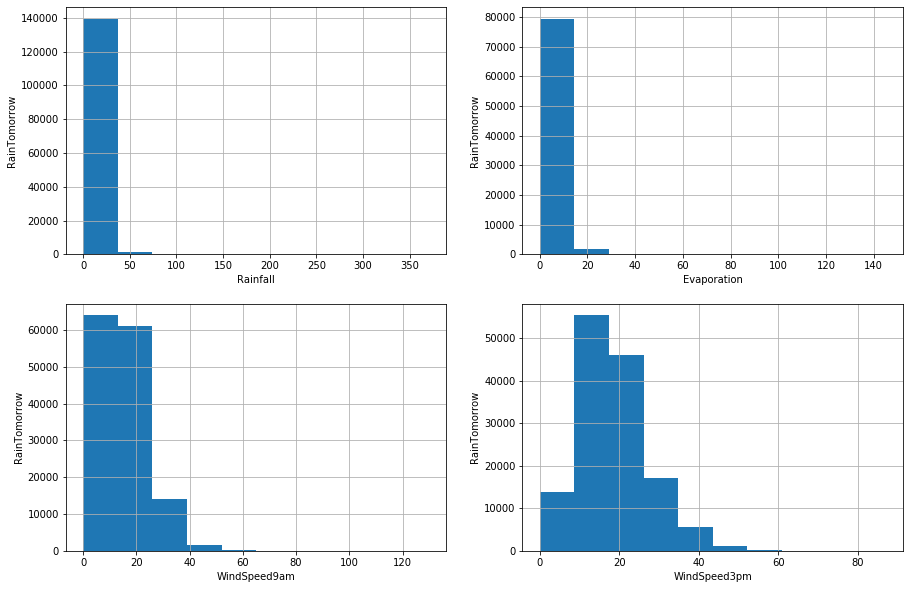

In [48]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

`Interpretation`:  We can see that all the four variables are skewed. So, we will use `interquantile range` to find outliers.

## Interquantile Range
You explain Sam about IQ range, that When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean.  When a data set has outliers, variability is often summarized by a statistic called the interquartile range, which is the difference between the first and third quartiles. The first quartile, denoted Q1, is the value in the data set that holds 25% of the values below it. The third quartile, denoted Q3, is the value in the data set that holds 25% of the values above it. The quartiles can be determined following the same approach that we used to determine the median, but we now consider each half of the data set separately.

For example, consider the following numbers: 1, 3, 4, 5, 5, 6, 7, 11. Q1 is the middle value in the first half of the data set. Since there are an even number of data points in the first half of the data set, the middle value is the average of the two middle values; that is, Q1 = (3 + 4)/2 or Q1 = 3.5. Q3 is the middle value in the second half of the data set. Again, since the second half of the data set has an even number of observations, the middle value is the average of the two middle values; that is, Q3 = (6 + 7)/2 or Q3 = 6.5. The interquartile range is Q3 minus Q1, so IQR = 6.5 - 3.5 = 3. 

 `DataFrame.quantile(q)`

    Return values at the given quantile over requested axis.

        qfloat or array-like, default 0.5 (50% quantile)
        
For Q3, we will use q=0.75, for Q1 it will be 0.25.

You then ask him to find thr lower and upper fences as well.

What is lower and upper fence? The Lower fence is the "lower limit" and the Upper fence is the "upper limit" of data, and any data lying outside this defined bounds can be considered an outlier. where Q1 and Q3 are the lower and upper quartile and IQR is the interquartile range.

    lower outer fence: Q1 - 3*IQ
    upper outer fence: Q3 + 3*IQ 




In [49]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


`Interpretation`:  Observe that For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

Similarly, Sam finds the outliers value for other numerical variables as well

In [50]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


`Interpretation`:  For `Evaporation`, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [51]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


`Interpretation`:  For `WindSpeed9am`, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [52]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


`Interpretation`:  For `WindSpeed3pm`, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

`Story`

Now, you explain Sam that the values which lie outside the fences are outliers and have to be removed.

We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. Sam will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [53]:
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for rows in df:
    df['Rainfall'] = max_value(df, 'Rainfall', 3.2)
    df['Evaporation'] = max_value(df, 'Evaporation', 21.8)
    df['WindSpeed9am'] = max_value(df, 'WindSpeed9am', 55)
    df['WindSpeed3pm'] = max_value(df, 'WindSpeed3pm', 57)

In [54]:
df.shape

(142193, 25)

Now, Sam checks for the maximum value of the columns

In [54]:
df.Rainfall.max()

3.2

In [55]:
df.Evaporation.max()

21.8

In [56]:
df.WindSpeed9am.max()

55.0

In [57]:
df.WindSpeed3pm.max()

57.0

In [58]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,0.682326,5.404478,7.624853,39.984292,13.997487,18.633563,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2012.758926,6.402544,15.715084
std,6.403283,7.117618,1.188116,3.698714,3.781525,13.588801,8.867389,8.783145,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


`Interpretation` :We can now see that the outliers in `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns are capped.

##  Feature Engineering and Pre Processing

`Story`

As Sam knows, **Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. we will carry out feature engineering on different types of variables.

`How?`
First, we will display the categorical and numerical variables again separately.

You ask him to Check data types in the dataframe


In [59]:

df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Year               int64
Month              int64
Day                int64
dtype: object

Now, you once again ask him to display the categorical values

In [60]:
# display categorical variables

categorical = [col for col in df.columns if df[col].dtypes == 'O']

categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

And numerical values

In [61]:
# display numerical variables

numerical = [col for col in df.columns if df[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Engineering missing values in numerical variables
`Stpry`

You now explain Sam the importance of Engineering missing values.
Before jumping to the methods of data imputation, we have to understand the reason why data goes missing.

    Missing at Random (MAR): Missing at random means that the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data
    Missing Completely at Random (MCAR): The fact that a certain value is missing has nothing to do with its hypothetical value and with the values of other variables.
    Missing not at Random (MNAR): Two possible reasons are that the missing value depends on the hypothetical value (e.g. People with high salaries generally do not want to reveal their incomes in surveys) or missing value is dependent on some other variable’s value (e.g. Let’s assume that females generally don’t want to reveal their ages! Here the missing value in age variable is impacted by gender variable)

In the first two cases, it is safe to remove the data with missing values depending upon their occurrences, while in the third case removing observations with missing values can produce a bias in the model. So we have to be really careful before removing observations. Note that imputation does not necessarily give better results.


#### Dropping Variables
You tell Sam that, it is always better to keep data than to discard it. Sometimes you can drop variables if the data is missing for more than 60% observations but only if that variable is insignificant. Having said that, imputation is always a preferred choice over dropping variables.

#### Mean, Median and Mode

Computing the overall mean, median or mode is a very basic imputation method, it is the only tested function that takes no advantage of the time series characteristics or relationship between the variables. It is very fast, but has clear disadvantages. One disadvantage is that mean imputation reduces variance in the dataset.


But first, you check for the numbers of missing values 

In [62]:


df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

`Interpretation` : We see that there is a lot of missing data

`Story`

Now, you ask him to print percentage of missing values in the numerical variables in training set.

You explain him to iterate through every cell in each column, and if the mean of null values is more than0, that is, if there are null values in the column, then you print the % with a precision of 4 decimat points, given the vastness of the dataset.


In [63]:

for col in numerical:
    if df[col].isnull().mean()>0:
        print(col, round(df[col].isnull().mean(),4))

MinTemp 0.0045
MaxTemp 0.0023
Rainfall 0.0099
Evaporation 0.4279
Sunshine 0.4769
WindGustSpeed 0.0652
WindSpeed9am 0.0095
WindSpeed3pm 0.0185
Humidity9am 0.0125
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3774
Cloud3pm 0.4015
Temp9am 0.0064
Temp3pm 0.0192


`Interpretation` : Although the number of NULL data is high, the percentage is really less.

`Story`

Now, you explain Sam that We assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, we will use median imputation because median imputation is robust to outliers.

`How?`

We will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

Now you ask him to impute missing values in the dataframe with respective column median in the dataframe.

You iterate through every cell and find the column median, and use the following code:

        `col_median=df[col].median()`
        `df[col].fillna(col_median, inplace=True)`

In [64]:
for rows in df:
    for col in numerical:
        col_median=df[col].median()
        df[col].fillna(col_median, inplace=True)           
      

Now, you ask him to check again missing values in numerical variables in the dataframe


In [65]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

`Interpretation` : Now, we can see that there are no missing values in the numerical columns of training and test set.

Now, we will be engineering missing values in categorical variables.

### Engineering missing values in categorical variables

You first print percentage of missing values in the categorical variables in the dataframe

In [66]:

df[categorical].isnull().mean()

Location        0.000000
WindGustDir     0.065615
WindDir9am      0.070418
WindDir3pm      0.026570
RainToday       0.009888
RainTomorrow    0.000000
dtype: float64

Now, you ask him to print categorical variables with missing data

In [67]:


for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

WindGustDir 0.06561504434114197
WindDir9am 0.07041837502549352
WindDir3pm 0.026569521706413114
RainToday 0.009887969168665123


You now ask him to impute missing categorical variables with most frequent value, ie, the mode.

For eg:
`df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)` is used to fill the missing values with mode in the WindDir9am column.

In [68]:


for rows in df:
    df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
    df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
    df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)


Now notice that had you filled the missing values in RainToay like the other ones, you would have seen an error, so you use the given piece of code `df["RainToday"].fillna( method ='ffill', inplace = True)` to impute the value.

In [69]:
df["RainToday"].fillna( method ='ffill', inplace = True)

Now you ask him to check missing values in categorical variables 


In [70]:

df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

As a final check, he will check for missing values in the dataframe.


In [71]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

`Interpretation` : After all the work, no column now contains any NULL data

### Encode categorical variables

`Story`

Now you explain Sam about `Category encoders`

This library comprises a set of transformers which follow the scikit-learn style which means that as well as being used alone, they can also be used inside a scikit-learn pipeline. The transformers provide a wide variety of methods to transform categorical data including the very popular one-hot encoding. This library is particularly useful for handling high cardinality features where the one-hot encoding method is likely to result in poorer model performance.

In [72]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Now, you check the values

In [73]:
df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


Now you ask Sam to encode RainToday variable

##### Note that you might have to install category_encoders using pip-install/conda-forge first

In [74]:

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

df = encoder.fit_transform(df)


In [75]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,8.0,5.0,16.9,21.8,0,1,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,5.0,5.0,17.2,24.3,0,1,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,5.0,2.0,21.0,23.2,0,1,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,5.0,5.0,18.1,26.5,0,1,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,0,1,No,2008,12,5


`Interpretation` : We can see that two additional variables `RainToday_0` and `RainToday_1` are created from `RainToday` variable.



`Story`

##### Now you ask Sam to Declare feature `vector and target` variable

The feature vector consist of every feature except the variable which has to be predicted, (RainTomorrow) in this case, and the target variable consists of only the Variable which has to be predicted

In [76]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

`Interpretation` : The target (y) and feature (X) variables have been declared

`Story`

Now you ask Sam if he knows about the dummy variables.

A dummy variable (aka, an indicator variable) is a numeric variable that represents categorical data, such as gender, race, political affiliation, etc.

Technically, dummy variables are dichotomous, quantitative variables. Their range of values is small; they can take on only two quantitative values. As a practical matter, regression results are easiest to interpret when dummy variables are limited to two specific values, 1 or 0. Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.

Call `pandas.get_dummies(df["column"])` where df is a Pandas DataFrame and column is a column in df to return a new DataFrame where column has been encoded as a dummy variable. 



In [77]:
X = pd.concat([X[numerical], X[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X.Location), 
                     pd.get_dummies(X.WindGustDir),
                     pd.get_dummies(X.WindDir9am),
                     pd.get_dummies(X.WindDir3pm)], axis=1)

In [78]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y.head()

## Split data into separate training and test set

Now, you ask him to split the dataset using SkLearn

In [79]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Now check the shape of X_train and X_test

In [80]:
X_train.shape, X_test.shape

((113754, 118), (28439, 118))

In [81]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
110803,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
87289,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
134949,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
85553,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16110,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
57576,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
124071,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
133468,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


`Interpretation` : The shape of the dataframe is as expected

You ask Sam to check the dataset once again

In [83]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,0.675580,5.145828,8.042236,39.920123,13.988030,18.640341,68.858235,51.495742,...,1015.252481,4.649568,4.702658,16.985681,21.675977,0.223935,0.776065,2012.758926,6.402544,15.715084
std,6.388936,7.109617,1.184153,2.813565,2.769638,13.140632,8.825786,8.701679,18.932512,20.532227,...,6.681810,2.294357,2.118753,6.472206,6.871243,0.416881,0.416881,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,1.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,1.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,1.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [84]:
cols =df.columns

`Interpretation` : We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

##  Model training

Now, you ask him to Train the model

In [85]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

##  Predict results

In [86]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

`Interpretation` : The results have been predicted and the answer is in Yes or No

### predict_proba method

`How`?

**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for probability of no rain` and `1 is for probability of rain.`

In [87]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.90055807, 0.88461752, 0.83290984, ..., 0.97433691, 0.80045641,
       0.28755574])

In [88]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.09944193, 0.11538248, 0.16709016, ..., 0.02566309, 0.19954359,
       0.71244426])

##  Check accuracy score

In [89]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8483


`Interpretation` : Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, we will compare the train-set and test-set accuracy to check for overfitting.

In [90]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [91]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8467


### Check for overfitting and underfitting

In [92]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8467
Test set score: 0.8483


`Interpretation` : The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting. 


`How?`

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting. 

We will increase C and fit a more flexible model.

We create the lists for error rate, train and test accuracies to display them for different values for c

In [93]:
import numpy as np
error_rate = []
test = []
train = []

c = [0.0001,0.001,0.01,0.1,1,10,100]
for i in c:
    print ('c = ',i)
    # fit the Logsitic Regression model with C in the list

    # instantiate the model
    logreg = LogisticRegression(C=i, solver='liblinear', random_state=0)


    # fit the model
    logreg.fit(X_train, y_train)
    pred = logreg.predict(X_test)
    train_accuracy=logreg.score(X_train,y_train)
    test_accuracy=logreg.score(X_test,y_test)
    train.append(train_accuracy)
    test.append(test_accuracy)
    print('Train Acc',train_accuracy)
    print('Test Acc',test_accuracy)
    
    accuracy = accuracy_score(y_test,pred,normalize=True) * float(100)
    

    print('CV accuracy for c = %.4f%% is %.4f%%' % (i, accuracy))
    error_rate.append(np.mean(pred != y_test))
    
    


c =  0.0001
Train Acc 0.8418956696028271
Test Acc 0.8454938640599177
CV accuracy for c = 0.0001% is 84.5494%
c =  0.001
Train Acc 0.8438736220264782
Test Acc 0.8454938640599177
CV accuracy for c = 0.0010% is 84.5494%
c =  0.01
Train Acc 0.8469064824094098
Test Acc 0.8483069024930553
CV accuracy for c = 0.0100% is 84.8307%
c =  0.1
Train Acc 0.8469943914060165
Test Acc 0.8482014135518127
CV accuracy for c = 0.1000% is 84.8201%
c =  1
Train Acc 0.8467218735165357
Test Acc 0.8483069024930553
CV accuracy for c = 1.0000% is 84.8307%
c =  10
Train Acc 0.845429611266417
Test Acc 0.8472520130806287
CV accuracy for c = 10.0000% is 84.7252%
c =  100
Train Acc 0.8477591996764949
Test Acc 0.8503815183374943
CV accuracy for c = 100.0000% is 85.0382%


`Interpretation` : We see that the maximum accuracy is for C=100

Now, you ask Sam to plot the Training vs Testing accuracy plot.

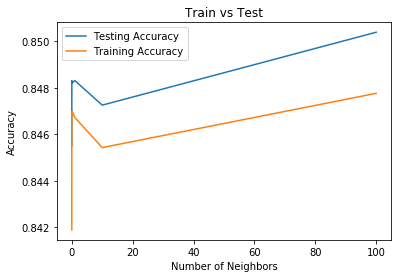

In [94]:

plt.title('Train vs Test')
plt.plot(c, test, label = 'Testing Accuracy')
plt.plot(c, train, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

`Interpretation` : We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

### Compare model accuracy with null accuracy


So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [95]:
# check class distribution in test set

y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

`Interpretation` : We can see that the occurences of most frequent class is 22067. So, we can calculate null accuracy by dividing 22067 by total number of occurences.

In [96]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


`Interpretation` : We can see that our model accuracy score is 0.8501 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

`Story` 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


`How?`

Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.

Lets assume we have a binary classification problem. We have some samples belonging to two classes : YES or NO. Also, we have our own classifier which predicts a class for a given input sample. On testing our model on 165 samples ,we get the following result.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [97]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20866  1201]
 [ 3113  3259]]

True Positives(TP) =  20866

True Negatives(TN) =  3259

False Positives(FP) =  1201

False Negatives(FN) =  3113


`Interpretation` : The confusion matrix shows `20892 + 3285 = 24177 correct predictions` and `3087 + 1175 = 4262 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 20892


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 3285


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1175 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3087 `(Type II error)`

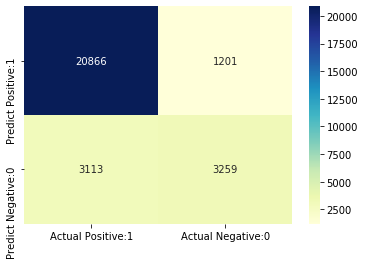

In [98]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

`Interpretation` : The results have been visualised

##  Classification metrices

`Story`

You now tell Sam that Classification Accuracy

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.


It works well only if there are equal number of samples belonging to each class.

For example, consider that there are 98% samples of class A and 2% samples of class B in our training set. Then our model can easily get 98% training accuracy by simply predicting every training sample belonging to class A.

When the same model is tested on a test set with 60% samples of class A and 40% samples of class B, then the test accuracy would drop down to 60%. Classification Accuracy is great, but gives us the false sense of achieving high accuracy.

The real problem arises, when the cost of misclassification of the minor class samples are very high. If we deal with a rare but fatal disease, the cost of failing to diagnose the disease of a sick person is much higher than the cost of sending a healthy person to more tests.

### Classification Report


`How?`

You explain Sam that **Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.


`F1 Score` is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model.

`Precision` : It is the number of correct positive results divided by the number of positive results predicted by the classifier.

`Recall` : It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).
We can print a classification report as follows:-

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.73      0.51      0.60      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439



`Interpretation` : The classification report has been printed

### Classification accuracy

In [100]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [101]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8483


`Interpretation` : We see that the model accuracy is lying around 85%

### Classification error

`Story`


You tell Sam that One of the greatest headaches is how to tackle measuring how accurate a model is in contrast to the know truth.

The first step is always understanding the cost of errors. Would you rather err on guessing something is true when it is not, or not guessing it at all. Sometimes it may be cheaper to lose a customer then spend the hours retaining them, or conversely the cost of vaccinations for those that may not get the disease versus the potential spreading of a sickness. This kind of cost/benefit analysis will inform the methodology used to identify the probability of being wrong.
The Importance of the Hypothesis

The most import part of modelling is starting with a meaningful question. Instinctively we form a question as a declaring something true, like “the space between airline seats is shrinking.” However, the best statistical practice is to create a null hypothesis(also often referred to as H0) like “the distance between seats has remained the same” and then seek to prove it wrong.

This provides a statistical version of innocent until proven guilty and can help to eliminate the affects of randomness. If the null hypothesis is disproved to a statistically significant degree, then the alternative hypothesis (referred to as H1) is reviewed and the airline’s shrinking tendencies is now considered as a possible but not definite explanation.

In [102]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1517


`Interpretation` : The classification error of 0.15 is not very large

### Precision

`Story`

**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP).`




In [103]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9456


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN).`





In [104]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8702


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [105]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8702


### False Positive Rate

In [106]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2693


### Specificity

Specificity or True Negative Rate (TNR)

TNR (ranges from 0 to 1, higher is better) measures the proportion of negatives that are correctly identified as such (e.g. the percentage of healthy people who are correctly identified as not having the condition).

In [107]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7307


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.



### Support


**Support** is the actual number of occurrences of the class in our dataset.

## Adjusting the threshold level

In [108]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.91791448, 0.08208552],
       [0.85865781, 0.14134219],
       [0.83530302, 0.16469698],
       [0.99113628, 0.00886372],
       [0.95877575, 0.04122425],
       [0.98136688, 0.01863312],
       [0.17981371, 0.82018629],
       [0.22061254, 0.77938746],
       [0.90612741, 0.09387259],
       [0.85079608, 0.14920392]])

`Interpretation` :

### Observations
You now ask Sam if he observed the following


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - 0 and 1.

    - Class 0 - predicted probability that there is no rain tomorrow.    
    
    - Class 1 - predicted probability that there is rain tomorrow.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of rain or no rain.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 1 - probability of rain is predicted if probability > 0.5.    
    
    - Class 0 - probability of no rain is predicted if probability < 0.5.    
    


Now, you ask him to store the probabilities in dataframe

In [109]:


y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.917914,0.082086
1,0.858658,0.141342
2,0.835303,0.164697
3,0.991136,0.008864
4,0.958776,0.041224
5,0.981367,0.018633
6,0.179814,0.820186
7,0.220613,0.779387
8,0.906127,0.093873
9,0.850796,0.149204


`Interpretation` : The values have been stored as expected

Now you print the first 10 predicted probabilities for class 1 - Probability of rain

In [110]:


logreg.predict_proba(X_test)[0:10, 1]

array([0.08208552, 0.14134219, 0.16469698, 0.00886372, 0.04122425,
       0.01863312, 0.82018629, 0.77938746, 0.09387259, 0.14920392])

In [111]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Now you ask Sam to proceed as per the Comments 

Text(0, 0.5, 'Frequency')

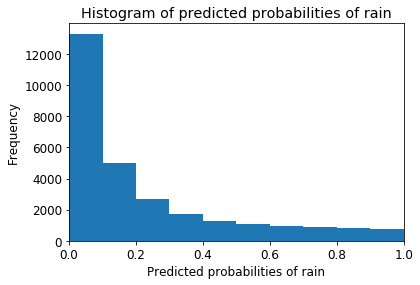

In [112]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

`Interpretation` :
### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.


- There are small number of observations with probability > 0.5.


- So, these small number of observations predict that there will be rain tomorrow.


- Majority of observations predict that there will be no rain tomorrow.

### Lower the threshold

You ask Sam to change the threshhold value and check how the confusion matrix changes

In [113]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[12726  9341]
 [  545  5827]] 

 with 18553 correct predictions,  

 9341 Type I errors( False Positives),  

 545 Type II errors( False Negatives),  

 Accuracy score:  0.652378775625022 

 Sensitivity:  0.9144695543000628 

 Specificity:  0.5766982371867494 



With 0.2 threshold the Confusion Matrix is  

 [[17032  5035]
 [ 1229  5143]] 

 with 22175 correct predictions,  

 5035 Type I errors( False Positives),  

 1229 Type II errors( False Negatives),  

 Accuracy score:  0.7797390906853265 

 Sensitivity:  0.8071249215317012 

 Specificity:  0.7718312412199212 



With 0.3 threshold the Confusion Matrix is  

 [[19068  2999]
 [ 1870  4502]] 

 with 23570 correct predictions,  

 2999 Type I errors( False Positives),  

 1870 Type II errors( False Negatives),  

 Accuracy score:  0.8287914483631632 

 Sensitivity:  0.7065285624607659 

 Specificity:  0.8640957085240404 



With 0.4 threshold the Confusion Matrix is  

 [[20171  1896

`Interpretation` :
You ask him to observe the following: 
### Comments


- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.


- Threshold can be adjusted to increase sensitivity or specificity. 


- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.


- We can see that increasing the threshold level results in increased accuracy.


- Adjusting the threshold level should be one of the last step you do in the model-building process.

##  ROC - AUC

`Story`


Now, you introduce him to the `ROX-AUC`


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`







In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).






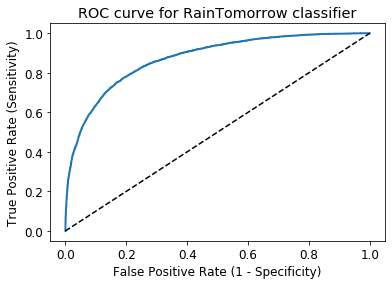

In [114]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


`Interpretation` : ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [115]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8728


`Interpretation` :
You ask him to keep in Mind the following

- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [116]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8679


## Model evaluation and improvement

`How?`

You tell Sam to use  `k-fold cross validation` and `hyperparameter optimization using GridSearchCV`, since he has used them before, it won't be much of a problem

##  k-Fold Cross Validation

In [117]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84774296 0.84365522 0.84273219 0.84756714 0.84641758]


We can summarize the cross-validation accuracy by calculating its mean.

In [118]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8456


`Interpretation` : Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

## Hyperparameter Optimization using GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

`Interpretation` : GridSearchCV improves the performance of our model by a small margin.

# Conclusion

    We have successfully predicted whether it will rain in Australia or not with an accuracy of above 80%
    We have learnt various new curves like the ROC curve
    We have learnt about the best parameters
    We have learnt to analyse our data very deeply
